In [16]:
import h5py
import matplotlib.pyplot as plt
from ramandecompy import spectrafit
from ramandecompy import dataprep

In [3]:
hdf5 = h5py.File('dataplot_300.hdf5', 'r')

In [9]:
x_data = list(hdf5['300C/25s/wavenumber'])
y_data = list(hdf5['300C/25s/counts'])

In [10]:
peaks = spectrafit.peak_detect(x_data, y_data)[0]

In [11]:
mod, pars = spectrafit.set_params(peaks)

In [12]:
out = spectrafit.model_fit(x_data, y_data, mod, pars)

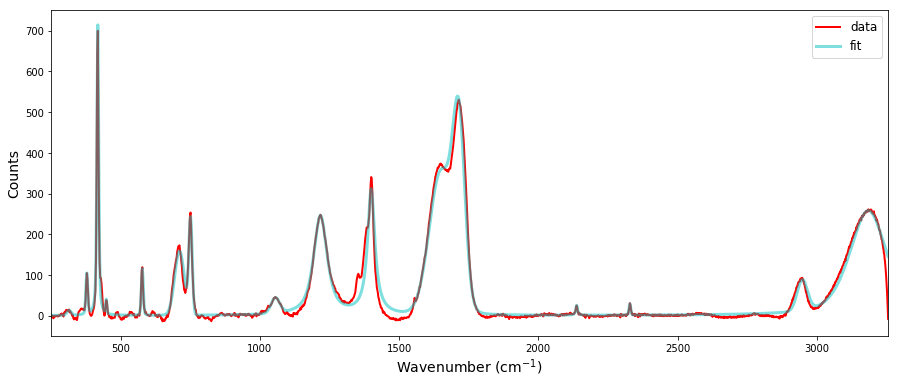

/Users/Parker1/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [40]:
spectrafit.plot_fit(x_data, y_data, out)

In [14]:
y_fit = out.best_fit

In [15]:
residuals = y_fit - y_data

(-153.55700858116543, 153.55700858116543)

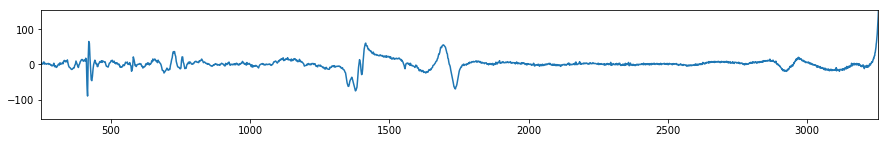

In [38]:
fig = plt.figure(figsize=(15,2))
ax = fig.add_subplot()
plt.plot(x_data, residuals)
plt.xlim(min(x_data), max(x_data))
ylim = max(abs(min(residuals)), abs(max(residuals)))
plt.ylim(-ylim, ylim)


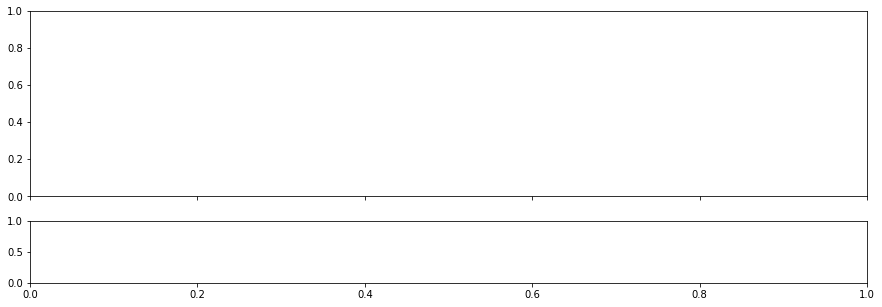

In [52]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]},
                               figsize=(15,5))